# **Analysis of Friends TV Series**

### Data Analysis Report

**Author**: Dominika Lach 
**Date**: May 2025

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# A brief description of the show
**Friends** is an American television sitcom created by *David Crane* and *Marta Kauffman*, which aired on NBC from September 22, 1994, to May 6, 2004, lasting ten seasons. With an ensemble cast starring *Jennifer Aniston*, *Courteney Cox*, *Lisa Kudrow*, *Matt LeBlanc*, *Matthew Perry* and *David Schwimmer*, the show revolves around six friends in their 20s and early 30s who live in Manhattan, New York City. The original executive producers were *Kevin S. Bright*, *Marta Kauffman*, and *David Crane*.

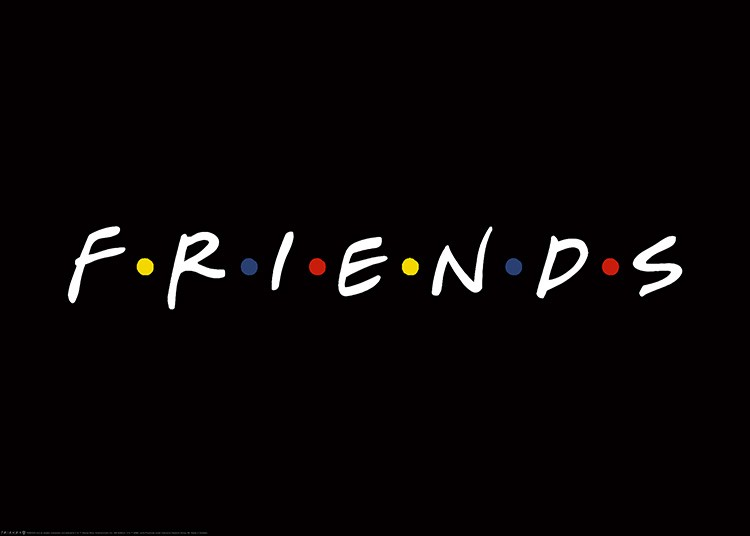

In [7]:
from IPython.display import Image
Image('logo.jpg', width=700)

In [3]:
friends = pd.read_csv('friends_episodes.csv')
friends.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
0,1,1,1,The One Where Monica Gets a Roommate,James Burrows,David Crane & Marta Kauffman,1994-09-22,456650,21500000.0
1,1,2,2,The One with the Sonogram at the End,James Burrows,David Crane & Marta Kauffman,1994-09-29,456652,20200000.0
2,1,3,3,The One with the Thumb,James Burrows,Jeffrey Astrof & Mike Sikowitz,1994-10-06,456651,19500000.0
3,1,4,4,The One with George Stephanopoulos,James Burrows,Alexa Junge,1994-10-13,456654,19700000.0
4,1,5,5,The One with the East German Laundry Detergent,Pamela Fryman,Jeff Greenstein & Jeff Strauss,1994-10-20,456653,18600000.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_1404\2291690071.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\DELL\AppData\Local\Temp\ipykernel_1404\2291690071.py:12: UserWarning: The palette list has more values (12) than needed (9), which may not be intended.
  sns.barplot(


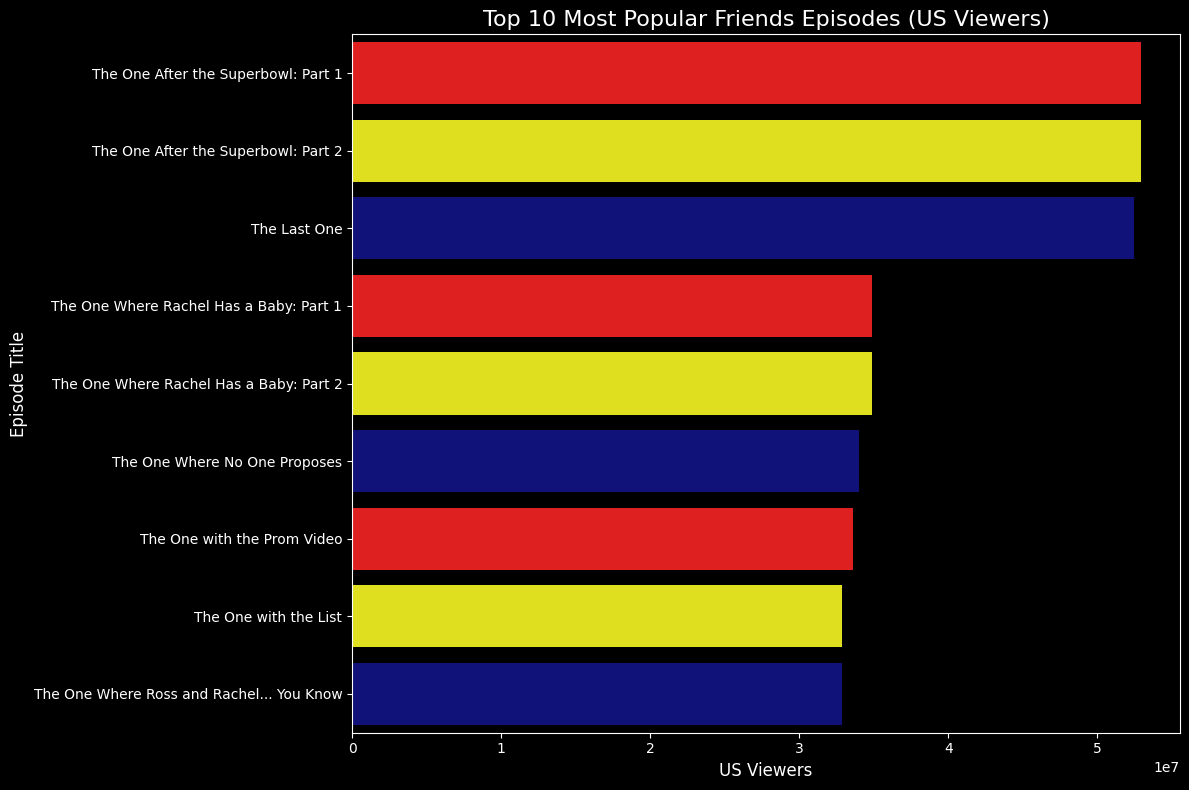

In [ ]:
top_10_episodes = friends.sort_values('us_viewers', ascending=False).head(10)


plt.style.use('dark_background')
plt.figure(figsize=(12, 8))

sns.barplot(
    x='us_viewers', 
    y='title', 
    data=top_10_episodes, 
    palette=['#FF0000', '#FFFF00', '#00008B'] * 4 
)

plt.title('Top 10 Most Popular Friends Episodes (US Viewers)', fontsize=16, color='white')
plt.xlabel('US Viewers', fontsize=12, color='white')
plt.ylabel('Episode Title', fontsize=12, color='white')
plt.xticks(color='white')
plt.yticks(color='white')

plt.tight_layout()
plt.show()


In [4]:
avg_viewers = friends.groupby('season')['us_viewers'].mean().reset_index()

C:\Users\DELL\AppData\Local\Temp\ipykernel_1404\1517060989.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='us_viewers', data=avg_viewers, palette=custom_palette)
C:\Users\DELL\AppData\Local\Temp\ipykernel_1404\1517060989.py:10: UserWarning: 
The palette list has fewer values (3) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='season', y='us_viewers', data=avg_viewers, palette=custom_palette)


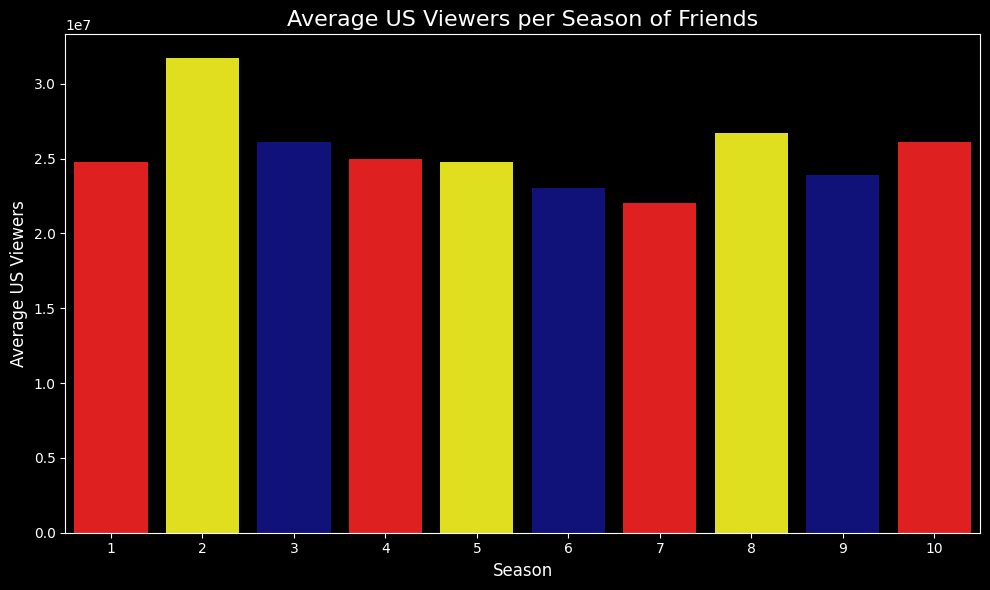

In [ ]:
# plots with friends palette
plt.figure(figsize=(10, 6))

custom_palette = ['#FF0000', '#FFFF00', '#00008B']  # red, yellow, dark blue

#plt.style.use('dark_background')

sns.barplot(x='season', y='us_viewers', data=avg_viewers, palette=custom_palette)

plt.title('Average US Viewers per Season of Friends', fontsize=16, color='white')
plt.xlabel('Season', fontsize=12, color='white')
plt.ylabel('Average US Viewers', fontsize=12, color='white')
plt.xticks(rotation=0, color='white')
plt.yticks(color='white')
plt.tight_layout()
plt.show()


In [ ]:
descriptions = []

for i in range(len(avg_viewers) - 1):
    season_current = avg_viewers.loc[i, 'season']
    season_next = avg_viewers.loc[i + 1, 'season']
    
    viewers_current = avg_viewers.loc[i, 'us_viewers']
    viewers_next = avg_viewers.loc[i + 1, 'us_viewers']
    
    diff = viewers_next - viewers_current
    diff_mil = abs(diff) / 1_000_000
    
    viewers_current_mil = viewers_current / 1_000_000
    viewers_next_mil = viewers_next / 1_000_000

    if diff > 0:
        trend = "increased"
    else:
        trend = "decreased"
    
   
    desc = (f"Between seasons {season_current} and {season_next}, "
            f"the average viewership {trend} by approximately {diff_mil:.1f} million "
            f"(from {viewers_current_mil:.1f}M to {viewers_next_mil:.1f}M).")
    
    descriptions.append(desc)


for d in descriptions:
    print(d)


Between seasons 1 and 2, the average viewership increased by approximately 6.9 million (from 24.8M to 31.7M).
Between seasons 2 and 3, the average viewership decreased by approximately 5.6 million (from 31.7M to 26.1M).
Between seasons 3 and 4, the average viewership decreased by approximately 1.1 million (from 26.1M to 24.9M).
Between seasons 4 and 5, the average viewership decreased by approximately 0.2 million (from 24.9M to 24.7M).
Between seasons 5 and 6, the average viewership decreased by approximately 1.7 million (from 24.7M to 23.0M).
Between seasons 6 and 7, the average viewership decreased by approximately 1.0 million (from 23.0M to 22.1M).
Between seasons 7 and 8, the average viewership increased by approximately 4.7 million (from 22.1M to 26.7M).
Between seasons 8 and 9, the average viewership decreased by approximately 2.8 million (from 26.7M to 23.9M).
Between seasons 9 and 10, the average viewership increased by approximately 2.2 million (from 23.9M to 26.1M).
